In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations
# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder, CountEncoder
import sys
sys.path.append("../../")
import src.soporte_encoding  as se
from src.soporte_graficas import (
    visualizar_categoricas
)
from src.SupportPreProcesamiento import (
    separarar_df
)

In [2]:
df = pd.read_csv("../../datos/03_api_rent_sin_nulos.csv")

# Encoding
- Vamos a pasar todas las variables a numéricas
- Hay que saber si tienen orden o no

### Pasar las columnas a su tipo correcto

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   propertyType      442 non-null    object 
 1   status            442 non-null    object 
 2   price             442 non-null    float64
 3   size              442 non-null    float64
 4   rooms             442 non-null    object 
 5   bathrooms         442 non-null    object 
 6   floor             442 non-null    object 
 7   municipality      442 non-null    object 
 8   exterior          442 non-null    object 
 9   hasLift           442 non-null    object 
 10  distancia_centro  442 non-null    object 
dtypes: float64(2), object(9)
memory usage: 38.1+ KB


### Separar df para ver si hay orden o no
- Hay un bug o algo, no puedo hacer estás gráficas(tal vez sean demasiadas)

In [4]:
numericas, categoricas = separarar_df(df)

Vamos a pintar un boxplot primero (Lo dejo como prueba)

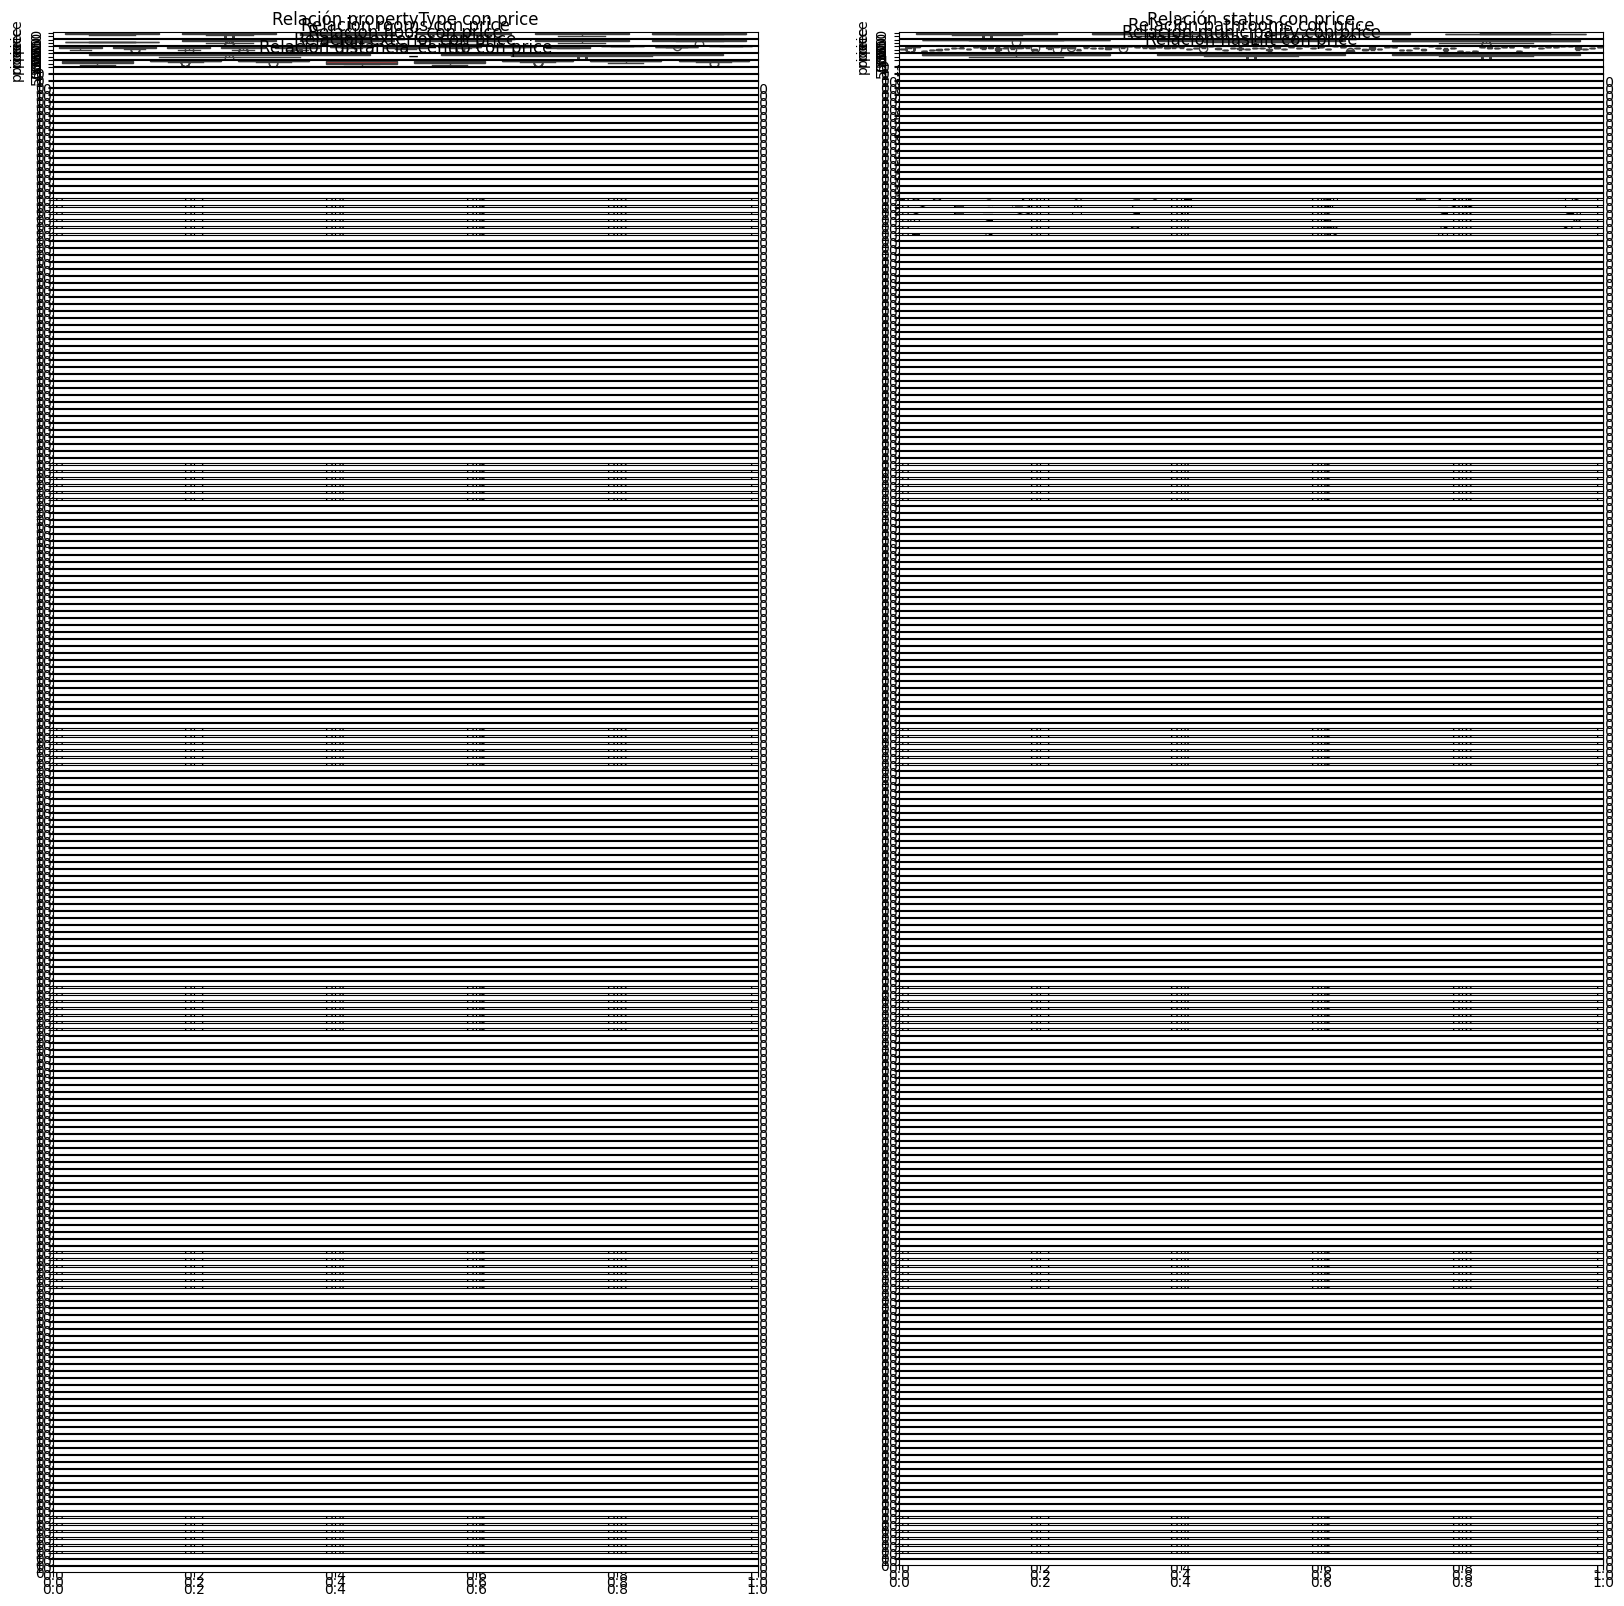

In [5]:
visualizar_categoricas(df,categoricas,"price","boxplot",grafica_size=(20,20))

Bueno yo no se vosotros, pero yo me he quedado igual, probamos con el barplot? (Lo dejo como prueba de que no funciona)

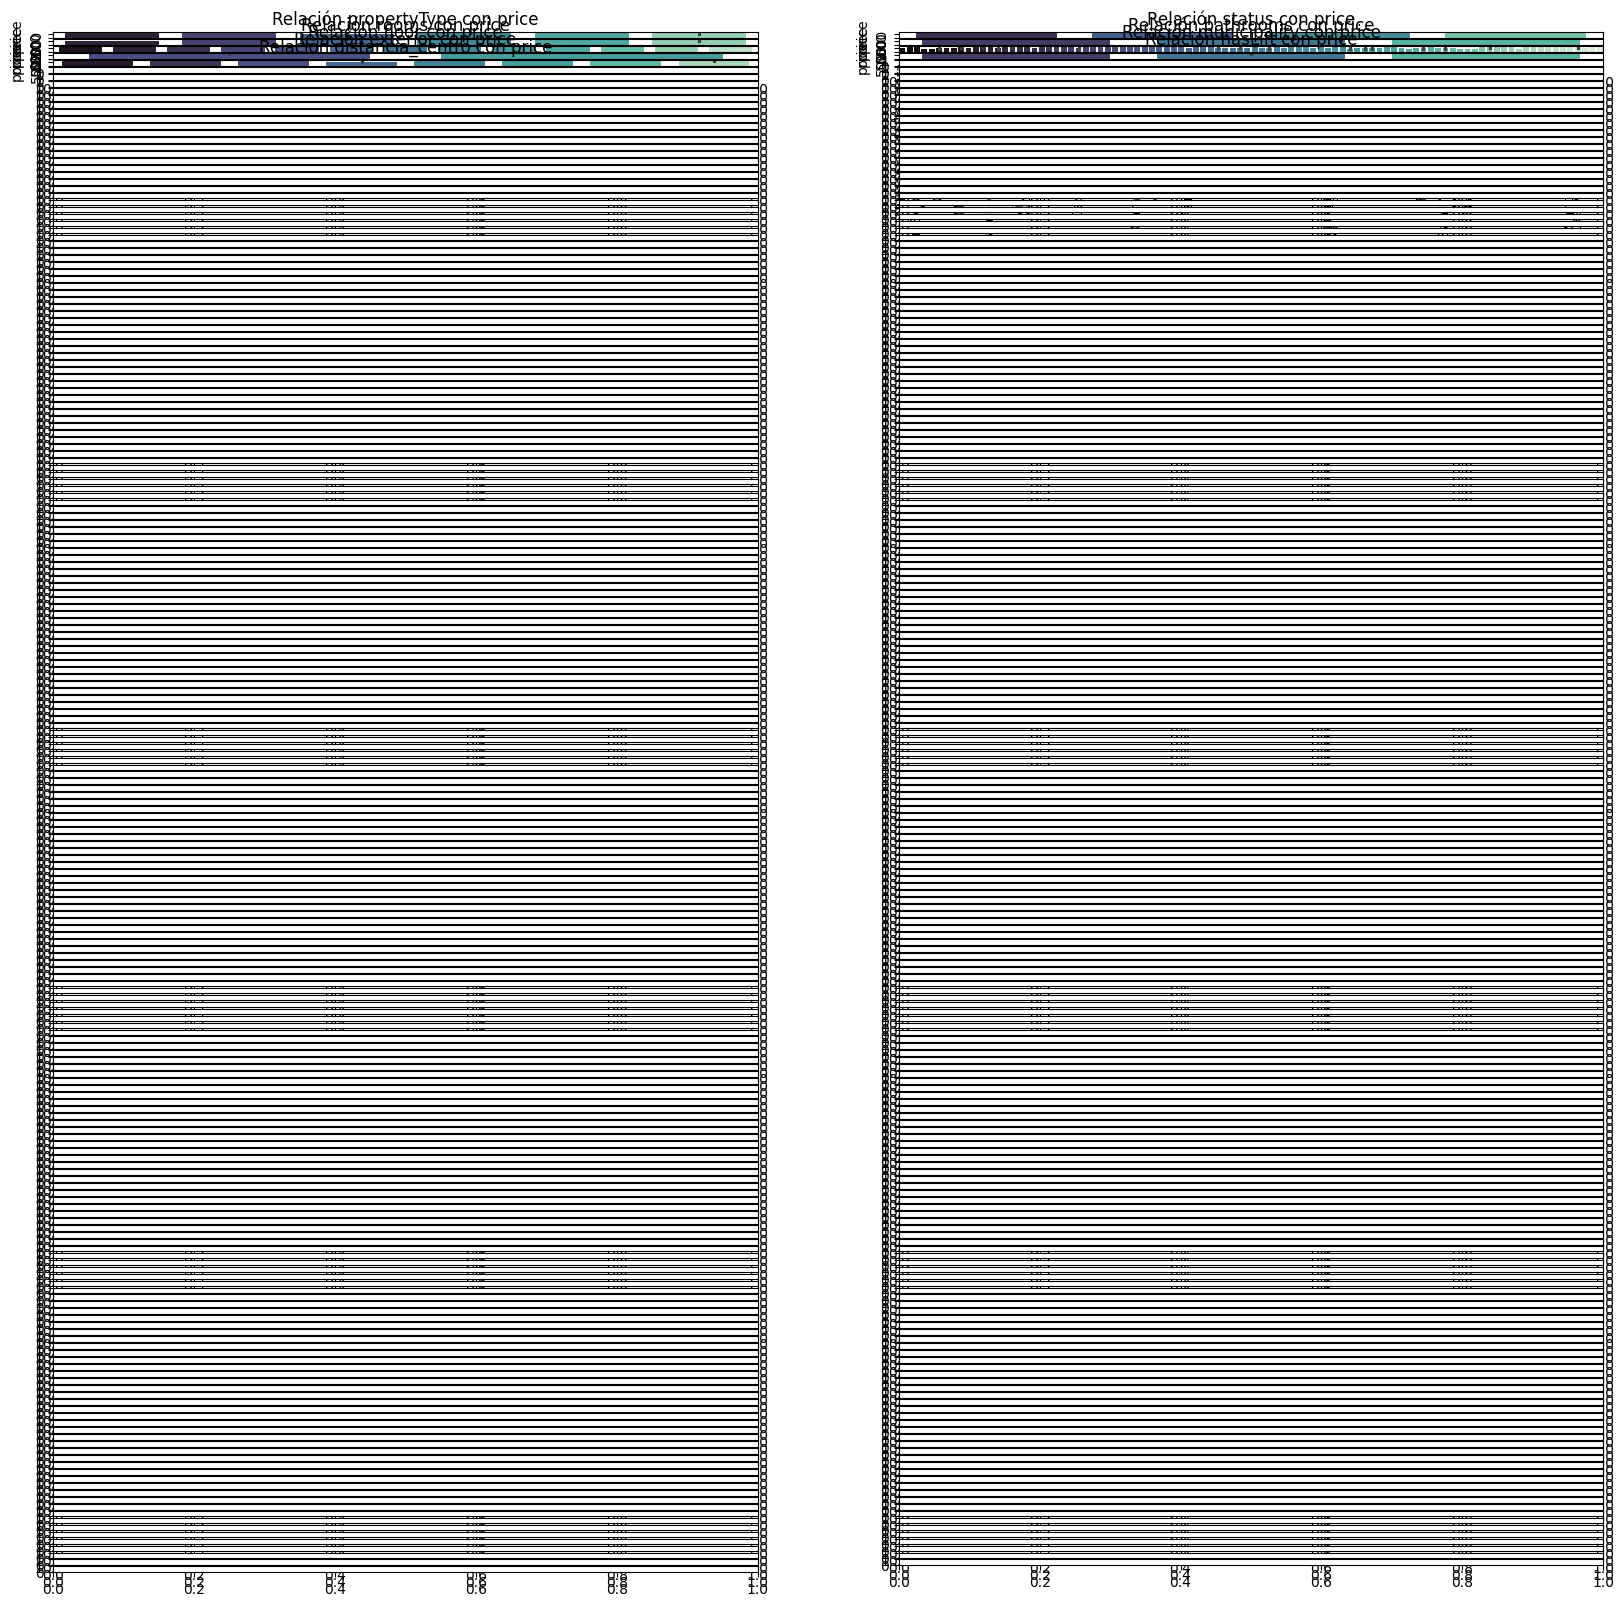

In [6]:
visualizar_categoricas(df,categoricas,"price","barplot",grafica_size=(20,20))

# Analicemos estadísticamente
- Dos opciones: mannwhitneyu
- Mas de dos opciones: Kruskal

No es una distribución normal

In [7]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in categoricas:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['chalet', 'flat', 'penthouse', 'studio', 'duplex', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 7.484388937937535
Valor p: 0.1870349717241078
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,5.0000,1.0000,-180.2440,190.2440,chalet-countryHouse
1,-1.5789,1.0000,-97.4671,94.3092,chalet-duplex
2,4.7241,1.0000,-75.2790,84.7273,chalet-flat
3,-78.5000,0.2062,-177.2354,20.2354,chalet-penthouse
4,19.6250,0.9868,-66.4505,105.7005,chalet-studio
5,-6.5789,1.0000,-182.7367,169.5788,countryHouse-duplex
6,-0.2759,1.0000,-168.3161,167.7644,countryHouse-flat
7,-83.5000,0.7597,-261.2237,94.2237,countryHouse-penthouse
8,14.6250,0.9999,-156.3897,185.6397,countryHouse-studio
9,6.3031,0.9995,-49.5247,62.1309,duplex-flat



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 5.729436965215766
Valor p: 0.12554189689727308
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,27.8574,0.5148,-24.3381,80.0529,desconocido-good
1,29.9744,0.7610,-48.9098,108.8585,desconocido-newdevelopment
2,-6.3333,0.9996,-167.8736,155.2069,desconocido-renew
3,2.1170,0.9997,-58.9406,63.1746,good-newdevelopment
4,-34.1907,0.9398,-187.8155,119.4341,good-renew
5,-36.3077,0.9413,-200.9252,128.3098,newdevelopment-renew



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['6 habitaciones', '1 habitacion', '2 habitaciones', '3 habitaciones', 'sin habitaciones', '4 habitaciones']

Realizando test de Kruskal...
Estadístico de prueba: 5.841275033890218
Valor p: 0.32197125141404204
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,20.0218,0.2995,-7.5263,47.5699,1 habitacion-2 habitaciones
1,10.4082,0.9530,-23.7624,44.5787,1 habitacion-3 habitaciones
2,11.1037,0.9989,-71.2701,93.4775,1 habitacion-4 habitaciones
3,-110.0074,0.7788,-350.1663,130.1515,1 habitacion-6 habitaciones
4,30.8497,0.2339,-9.0564,70.7559,1 habitacion-sin habitaciones
5,-9.6137,0.9603,-42.4518,23.2245,2 habitaciones-3 habitaciones
6,-8.9181,0.9996,-90.7482,72.9120,2 habitaciones-4 habitaciones
7,-130.0292,0.6313,-370.0022,109.9437,2 habitaciones-6 habitaciones
8,10.8279,0.9675,-27.9435,49.5993,2 habitaciones-sin habitaciones
9,0.6955,1.0000,-83.5950,84.9861,3 habitaciones-4 habitaciones



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3 aseos', '1 aseo', '2 aseos']

Realizando test de Kruskal...
Estadístico de prueba: 6.248039485600839
Valor p: 0.04398002423541008
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-27.8702,0.0205,-52.2691,-3.4714,1 aseo-2 aseos
1,13.9104,0.9136,-66.8722,94.6929,1 aseo-3 aseos
2,41.7806,0.4643,-41.3181,124.8793,2 aseos-3 aseos



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'tercero', 'bajo', 'segundo', 'primero', 'quinto', 'entreplanta', 'cuarto', 'sotano', 'octavo', 'septimo', 'sexto', 'decimo cuarto']

Realizando test de Kruskal...
Estadístico de prueba: 17.03974000666494
Valor p: 0.14810852902524818
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,32.1936,0.8188,-25.5425,89.9297,bajo-cuarto
1,80.3881,0.9992,-201.0835,361.8596,bajo-decimo cuarto
2,-4.4638,1.0000,-50.6028,41.6752,bajo-desconocido
3,9.5547,1.0000,-109.5053,128.6147,bajo-entreplanta
4,40.7881,0.9980,-88.7392,170.3154,bajo-octavo
...,...,...,...,...,...
73,-15.0000,1.0000,-357.1867,327.1867,septimo-sotano
74,-65.2034,0.9999,-346.9554,216.5487,septimo-tercero
75,26.2500,1.0000,-215.7125,268.2125,sexto-sotano
76,-23.9534,1.0000,-168.3084,120.4016,sexto-tercero



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Numancia de la Sagra', 'Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Recas', 'Cedillo del Condado', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'El Viso de San Juan', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Camarena', 'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo', 'Azuqueca de Henares', 'El Espinar', 'Las Rozas de Madrid', 'Guadalajara', 'Illescas', 'Navalcarnero', 'Seseña', 'Casarrubios del Monte', 'Alcalá de Henares', 'El Escorial', 'Calypo Fado', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Marchamalo', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Pozo de Guadalajara', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jara

,meandiff,p-adj,lower,upper,group_diff
0,105.0909,1.0000,-139.2504,349.4322,Alameda de la Sagra-Alcalá de Henares
1,95.0000,1.0000,-242.9553,432.9553,Alameda de la Sagra-Alcobendas
2,120.0000,1.0000,-138.1176,378.1176,Alameda de la Sagra-Alcorcón
3,62.5000,1.0000,-230.1779,355.1779,Alameda de la Sagra-Aldea del Fresno
4,150.0000,1.0000,-187.9553,487.9553,Alameda de la Sagra-Algete
...,...,...,...,...,...
4555,-103.3333,0.9998,-298.4519,91.7852,Yebes-Yuncler
4556,-53.3333,1.0000,-222.3110,115.6443,Yebes-Yuncos
4557,30.0000,1.0000,-169.9370,229.9370,Yeles-Yuncler
4558,80.0000,1.0000,-94.5194,254.5194,Yeles-Yuncos



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['vista interior', 'vista exterior']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 14794.5
Valor p: 0.9208808041832892
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-1.1273,0.9124,-21.2484,18.9938,vista exterior-vista interior



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'tiene ascensor', 'no tiene ascensor']

Realizando test de Kruskal...
Estadístico de prueba: 3.500899932366309
Valor p: 0.17369576864170821
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,14.9205,0.6305,-23.3885,53.2295,desconocido-no tiene ascensor
1,22.3513,0.3468,-15.4557,60.1583,desconocido-tiene ascensor
2,7.4308,0.6451,-12.1406,27.0022,no tiene ascensor-tiene ascensor



###########################

Estamos analizando la variable DISTANCIA_CENTRO
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable distancia_centro las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Entre 40 y 50 km', 'Entre 5 y 10 km', 'Entre 10 y 20 km', 'Mas de 50 km', 'Entre 30 y 40 km', 'Entre 1 y 5 km', 'Entre 20 y 30 km', 'Menos de 1 km']

Realizando test de Kruskal...
Estadístico de prueba: 98.60527610915022
Valor p: 2.0934415866810487e-18
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1.8831,1.0000,-36.4414,40.2076,Entre 1 y 5 km-Entre 10 y 20 km
1,-1.7755,1.0000,-38.9449,35.3939,Entre 1 y 5 km-Entre 20 y 30 km
2,-72.7581,0.0000,-111.5326,-33.9835,Entre 1 y 5 km-Entre 30 y 40 km
3,-83.3100,0.0000,-125.5883,-41.0318,Entre 1 y 5 km-Entre 40 y 50 km
4,10.2604,0.9893,-26.0730,46.5938,Entre 1 y 5 km-Entre 5 y 10 km
5,-126.2823,0.0000,-170.0649,-82.4997,Entre 1 y 5 km-Mas de 50 km
6,-12.3656,0.9993,-80.4514,55.7202,Entre 1 y 5 km-Menos de 1 km
7,-3.6586,1.0000,-40.3583,33.0410,Entre 10 y 20 km-Entre 20 y 30 km
8,-74.6412,0.0000,-112.9657,-36.3167,Entre 10 y 20 km-Entre 30 y 40 km
9,-85.1932,0.0000,-127.0591,-43.3272,Entre 10 y 20 km-Entre 40 y 50 km



###########################



# Resultados
### Variables ordinales
- bathrooms
- municipality
- distancia-centro
### Variables Nominales
- propertyType
- status
- rooms
- floor
- exterior
- hasLift

# Tenemos Ordinales y Nominales
- Las ordinales las gestionaremos con Target Encoding, que codifica con la media del objetivo para la categoría
- Para las nominales usaremos one-Hot Encoding

In [8]:
df.sample()

,propertyType,status,price,size,rooms,bathrooms,floor,municipality,exterior,hasLift,distancia_centro
406,flat,good,750.0,80.0,2 habitaciones,1 aseo,cuarto,Valdemoro,vista exterior,tiene ascensor,Entre 20 y 30 km


# Ordinales

In [9]:
cols_ordinales = ["bathrooms","municipality","distancia_centro"]

### Target Encoder

In [10]:
target_encoder = TargetEncoder(cols=cols_ordinales)
df = target_encoder.fit_transform(df,df[["price"]])

In [11]:
df.sample()

,propertyType,status,price,size,rooms,bathrooms,floor,municipality,exterior,hasLift,distancia_centro
284,flat,good,720.0,44.0,3 habitaciones,677.756303,segundo,705.594108,vista interior,no tiene ascensor,711.714042


# Nominales

In [12]:
cols_nominales = ["propertyType","status","rooms","floor","exterior","hasLift"]

### OneHotEncoder

In [13]:
encoder = OneHotEncoder(categories='auto', 
                        drop=None, 
                        sparse_output=True, 
                        dtype='float', 
                        handle_unknown='error')

# Ajustar el codificador a los datos y transformarlos
encoder_trans = encoder.fit_transform(df[cols_nominales])

# lo siguiente que hacemos es convertir el objeto devuelto por el fit_transform a array para poder verlo
encoder_array = encoder_trans.toarray()

# usaremos el método '.get_feature_names_out()' para extraer el nombre de las columnas
nombre_columnas = encoder.get_feature_names_out()

# creamos un DataFrame con los resultados obtenidos de la transformación
encoder_df = pd.DataFrame(encoder_array, columns = nombre_columnas)

# concatenamos estos resultados con el DataFrame original
df = pd.concat([df, encoder_df], axis = 1)

In [14]:
df.sample()

,propertyType,status,price,size,rooms,bathrooms,floor,municipality,exterior,hasLift,distancia_centro,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_desconocido,status_good,status_newdevelopment,status_renew,rooms_1 habitacion,rooms_2 habitaciones,rooms_3 habitaciones,rooms_4 habitaciones,rooms_6 habitaciones,rooms_sin habitaciones,floor_bajo,floor_cuarto,floor_decimo cuarto,floor_desconocido,floor_entreplanta,floor_octavo,floor_primero,floor_quinto,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
109,duplex,good,700.0,35.0,1 habitacion,677.756303,bajo,705.594108,vista exterior,no tiene ascensor,677.987103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Eliminar columnas nominales
- Ya tenemos las columnas generadas y ya no nos aportan información

In [15]:
df.drop(columns=cols_nominales,inplace=True)

In [16]:
df.sample()

,price,size,bathrooms,municipality,distancia_centro,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_desconocido,status_good,status_newdevelopment,status_renew,rooms_1 habitacion,rooms_2 habitaciones,rooms_3 habitaciones,rooms_4 habitaciones,rooms_6 habitaciones,rooms_sin habitaciones,floor_bajo,floor_cuarto,floor_decimo cuarto,floor_desconocido,floor_entreplanta,floor_octavo,floor_primero,floor_quinto,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
197,720.0,69.0,677.756303,690.628377,699.636288,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Guardamos
- Nos vamos a feature scaling con este df

In [17]:
df.to_csv("../../datos/04_rent_target_onehot_encoded.csv",index=False)